### Importing The Libraries

In [732]:
#Data manipulation
#===============================================================
import pandas as pd
import numpy as np 

#Data Visualization
#===============================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap

#Models 
#===============================================================
from sklearn.cluster import KMeans 

#Dimensionality Reduction 
#===============================================================
from sklearn.decomposition import PCA

#PipeLines
#===============================================================
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Data Preprocessing
#===============================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#warnings
#===============================================================
import warnings
warnings.filterwarnings("ignore")


### Read The Data 

In [680]:
df=pd.read_csv('Wholesale customers data.csv')

### EDA

In [681]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [682]:
len(df)

440

In [683]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [684]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Mean is too High we Need to scale our data 

In [685]:
df.loc[:,"Fresh":].describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [687]:
indices = [22,154,398] # Row Numbers
samples = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,31276,1917,4469,9408,2381,4334
1,1,3,622,55,137,75,7,8
2,1,3,11442,1032,582,5390,74,247


### Outlier Detection For Analysis 

In [688]:
# Get the Numaric Values
numaric_col=df.loc[:,"Fresh":]
numaric_col

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [689]:
def detect_and_remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper=q3 +(1.5*iqr)
    lower=q1 - (1.5*iqr)
    outliers=df[(df[column]<lower) | (df[column]>upper)]
    return outliers

In [690]:
detect_and_remove_outliers(df, 'Fresh')


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
29,1,3,43088,2100,2609,1200,1107,823
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
52,2,3,40721,3916,5876,532,2587,1278
87,1,3,43265,5025,8117,6312,1579,14351
103,1,3,56082,3504,8906,18028,1480,2498
125,1,3,76237,3473,7102,16538,778,918
129,1,3,42312,926,1510,1718,410,1819
176,1,3,45640,6958,6536,7368,1532,230
181,1,3,112151,29627,18148,16745,4948,8550


In [691]:
detect_and_remove_outliers(df, 'Milk')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
28,2,3,4113,20484,25957,1158,8604,5206
38,2,3,4591,15729,16709,33,6956,433
45,2,3,5181,22044,21531,1740,7353,4985
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944


In [692]:
detect_and_remove_outliers(df, 'Grocery')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
28,2,3,4113,20484,25957,1158,8604,5206
43,2,3,630,11095,23998,787,9529,72
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903


In [693]:
detect_and_remove_outliers(df, 'Frozen')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
22,1,3,31276,1917,4469,9408,2381,4334
39,1,3,56159,555,902,10002,212,2916
40,1,3,24025,4332,4757,9510,1145,5864
47,2,3,44466,54259,55571,7782,24171,6465
70,1,3,16705,2037,3202,10643,116,1365
72,1,3,4420,5139,2661,8872,1321,181
73,2,3,19899,5332,8713,8132,764,648
88,1,3,7864,542,4042,9735,165,46
91,1,3,12754,2762,2530,8693,627,1117
93,1,3,11314,3090,2062,35009,71,2698


In [694]:
detect_and_remove_outliers(df, 'Detergents_Paper')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,2,3,630,11095,23998,787,9529,72
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
92,2,3,9198,27472,32034,3232,18906,5130


In [695]:
detect_and_remove_outliers(df, 'Delicassen')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
24,2,3,22647,9776,13792,2915,4482,5778
28,2,3,4113,20484,25957,1158,8604,5206
36,1,3,29955,4362,5428,1729,862,4626
40,1,3,24025,4332,4757,9510,1145,5864
45,2,3,5181,22044,21531,1740,7353,4985


In [696]:
for i in numaric_col:
    df_no_outliers = detect_and_remove_outliers(df, i)

### See the dist of each column after removing the outlier  

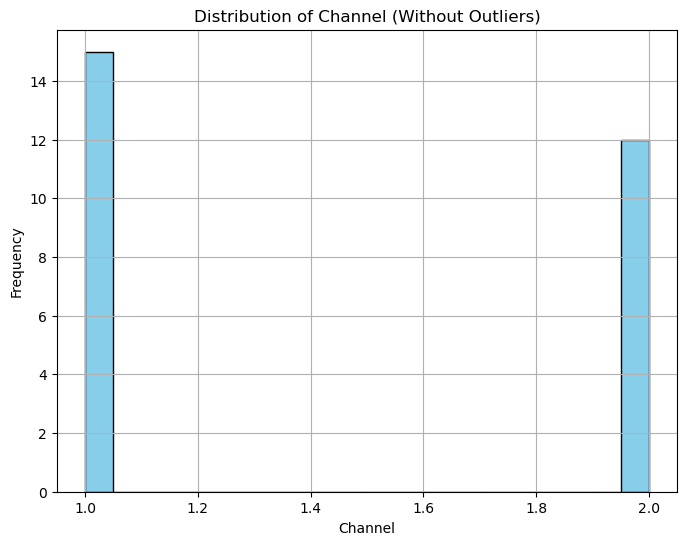

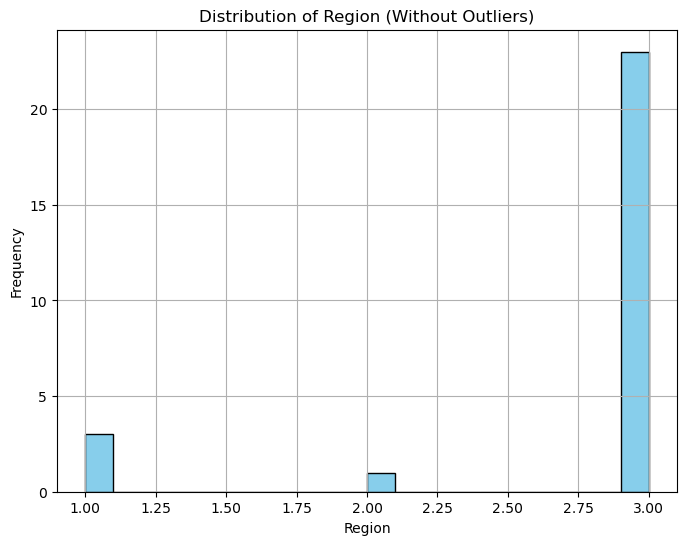

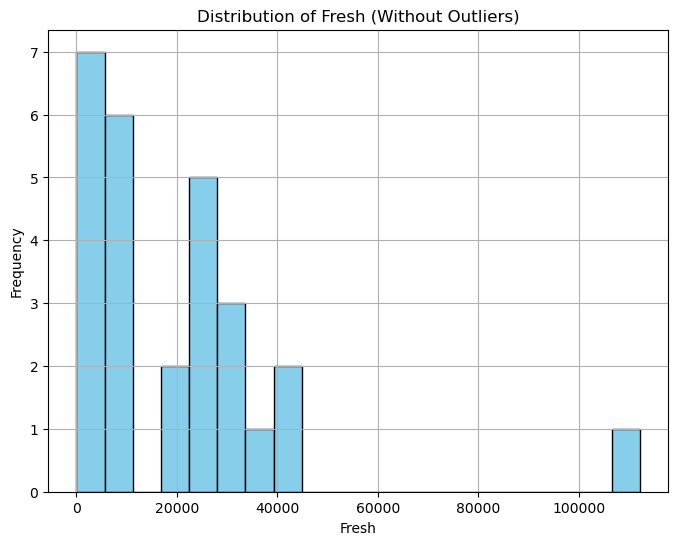

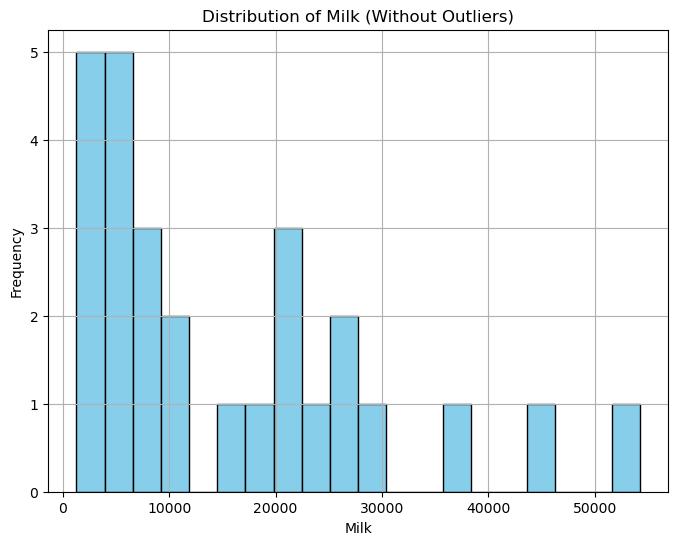

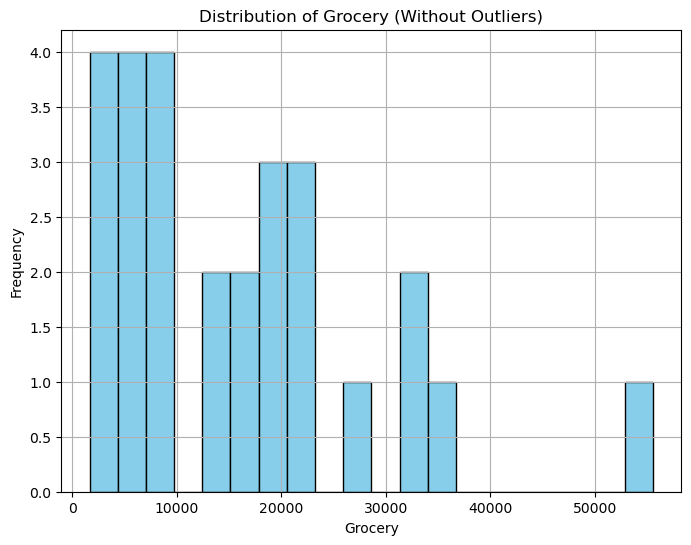

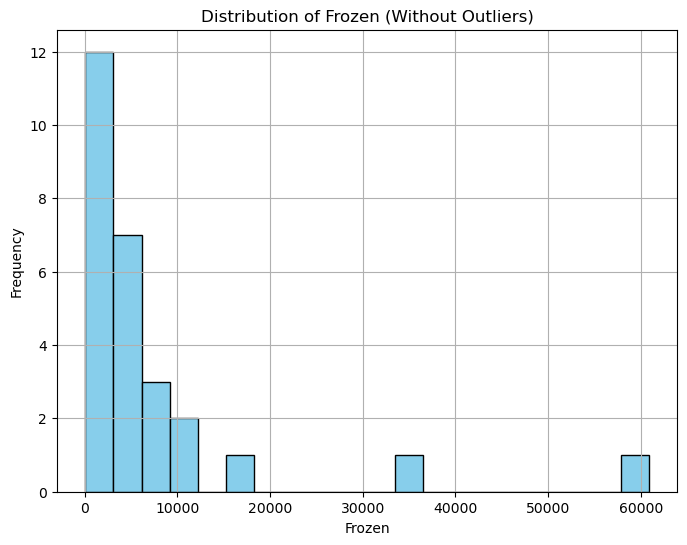

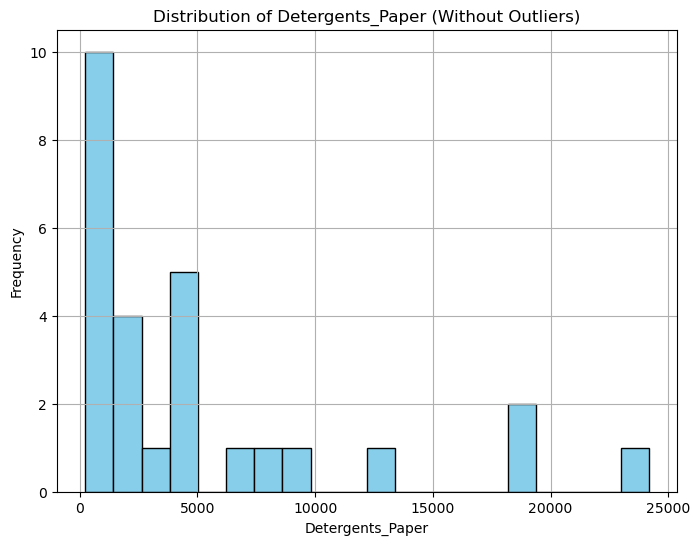

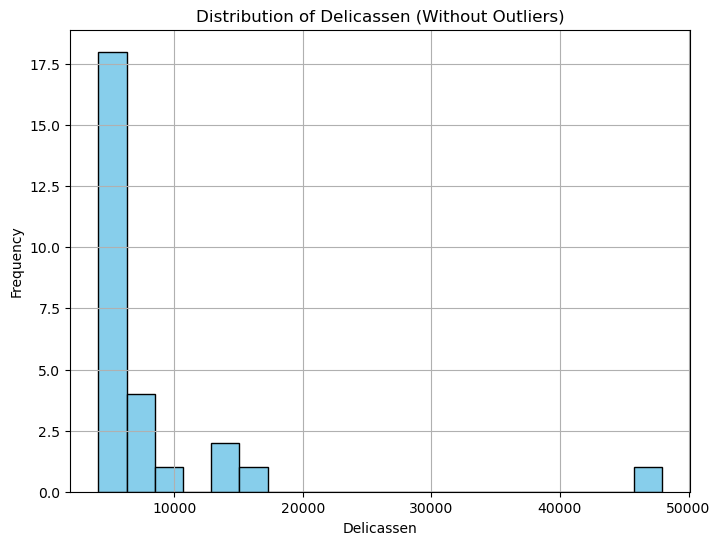

In [697]:
for column in df_no_outliers.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_no_outliers[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

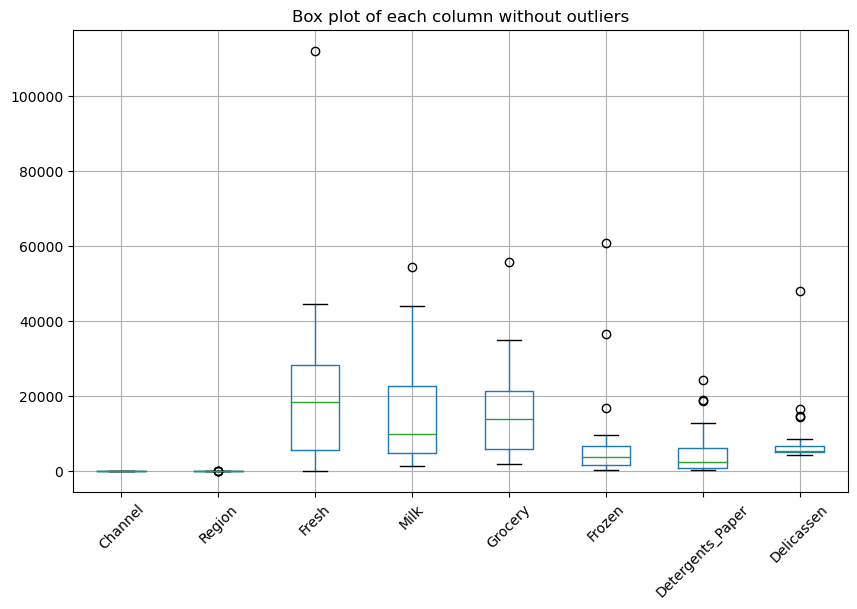

In [698]:
plt.figure(figsize=(10, 6))
df_no_outliers.boxplot()
plt.title('Box plot of each column without outliers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Note : I just Remove the outliers to see which value are an outlier and see how the distribution will look like after removing them  

In [699]:
def detect_and_remove_outliers(df):
    outliers_indices = []
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + (1.5 * iqr)
        lower = q1 - (1.5 * iqr)
        outliers = df[(df[column] < lower) | (df[column] > upper)]
        outliers_indices.extend(outliers.index)
    outliers_indices = list(set(outliers_indices))
    df_cleaned = df.drop(outliers_indices)
    return df_cleaned

In [700]:
cleaned_df = detect_and_remove_outliers(df)

In [701]:
cleaned_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


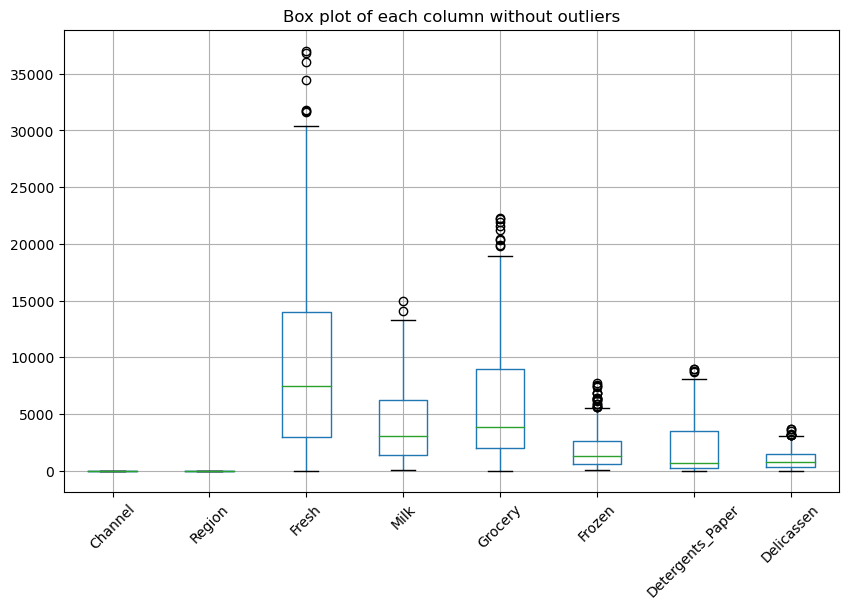

In [702]:
plt.figure(figsize=(10, 6))
cleaned_df.boxplot()
plt.title('Box plot of each column without outliers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bivariate Analysis with the outliers 

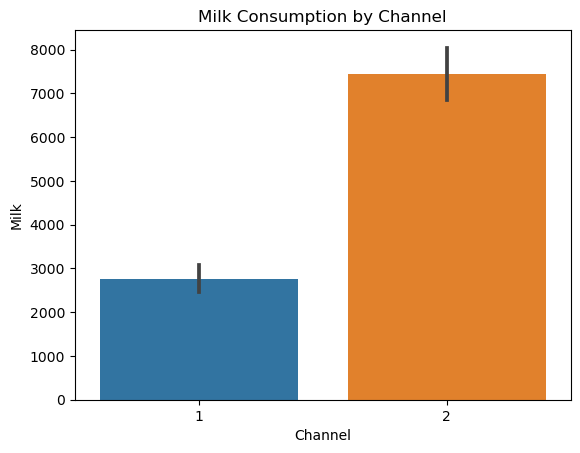

In [703]:
sns.barplot(cleaned_df,x='Channel',y='Milk')
plt.title('Milk Consumption by Channel')
plt.show()

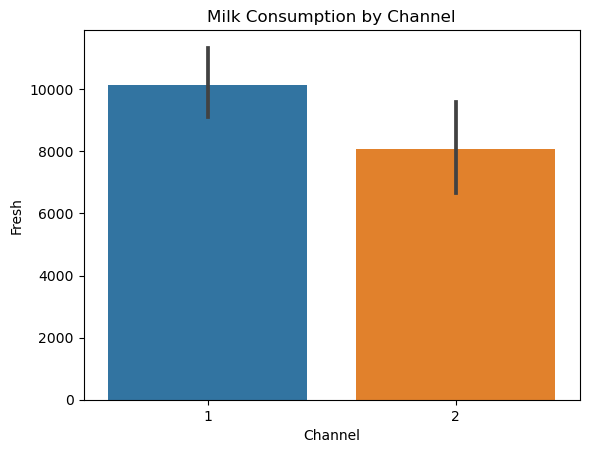

In [704]:
sns.barplot(cleaned_df,x='Channel',y='Fresh')
plt.title('Milk Consumption by Channel')
plt.show()

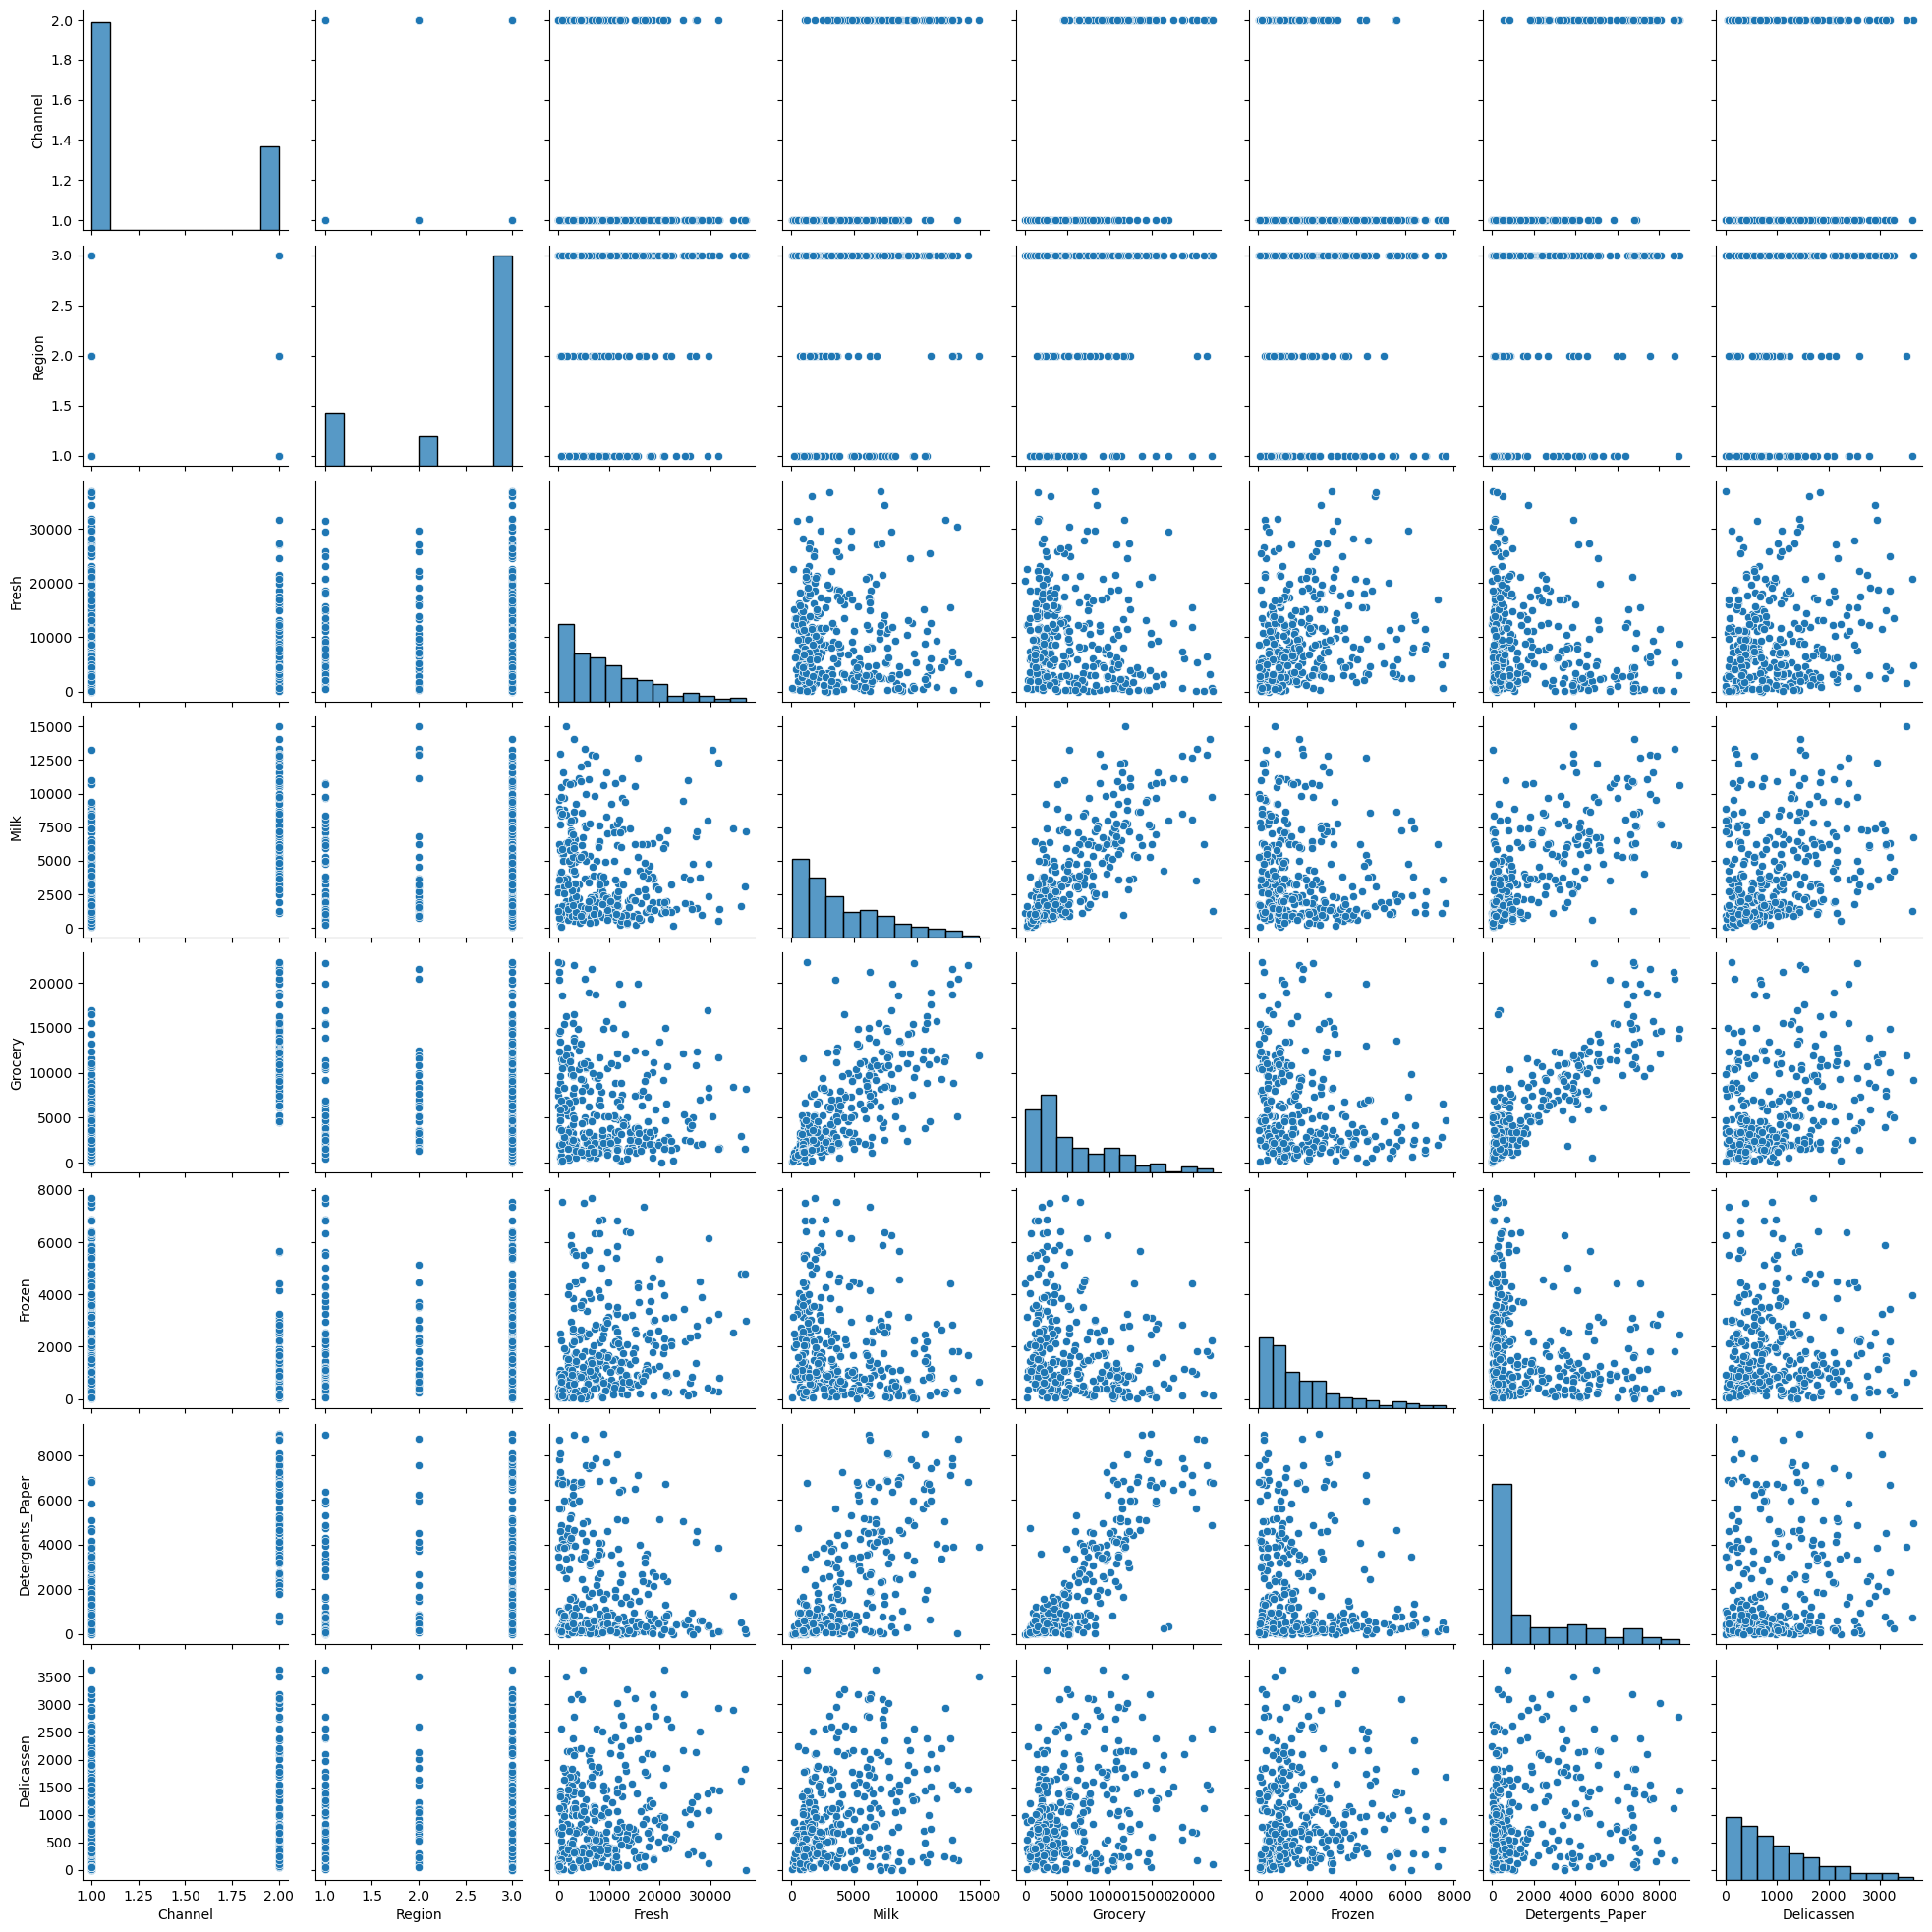

In [705]:
sns.pairplot(cleaned_df)
plt.show()

# Univariate  Analysis

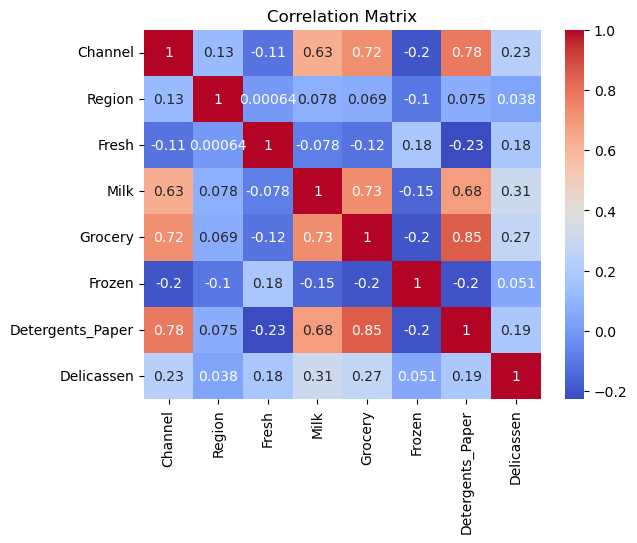

In [706]:
correlation_matrix = cleaned_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

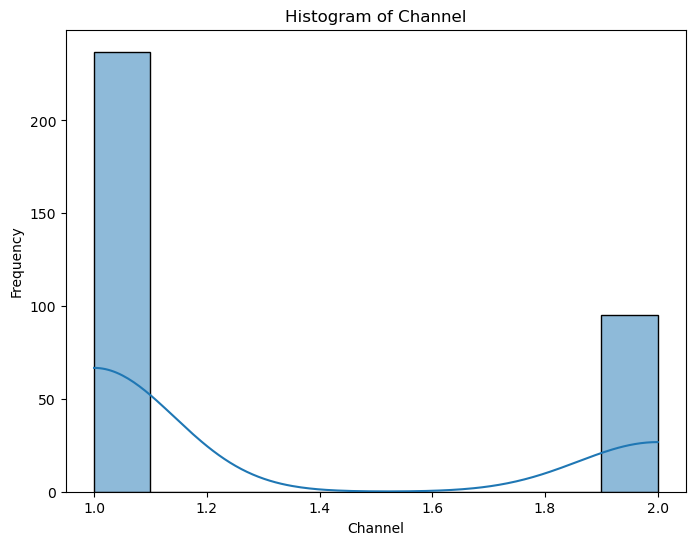

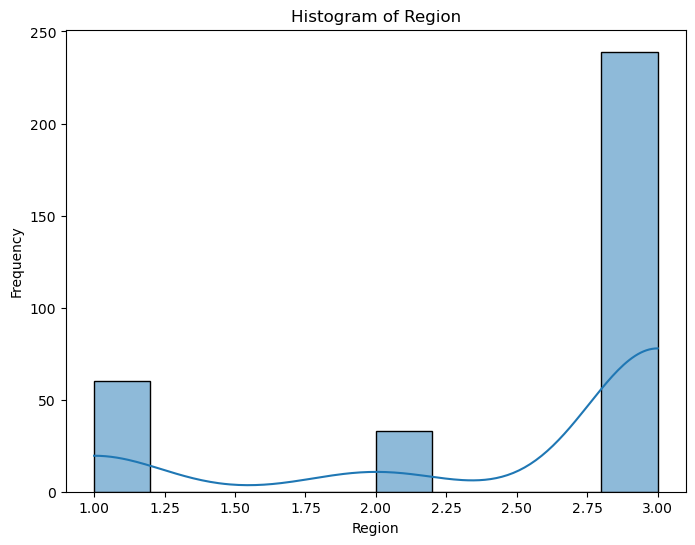

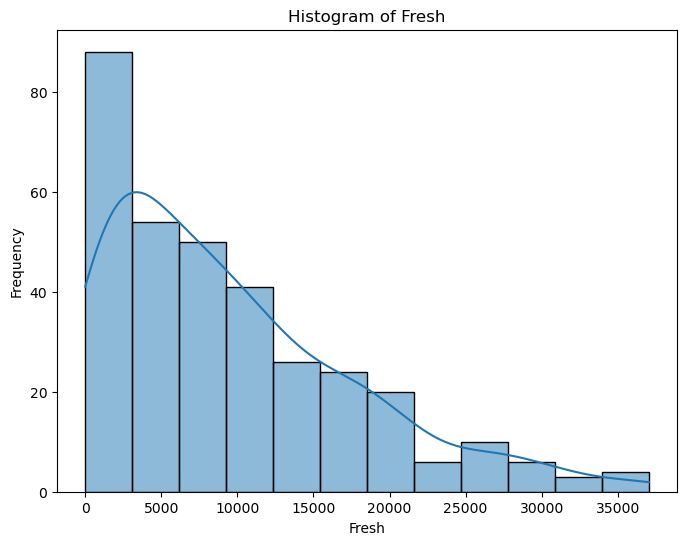

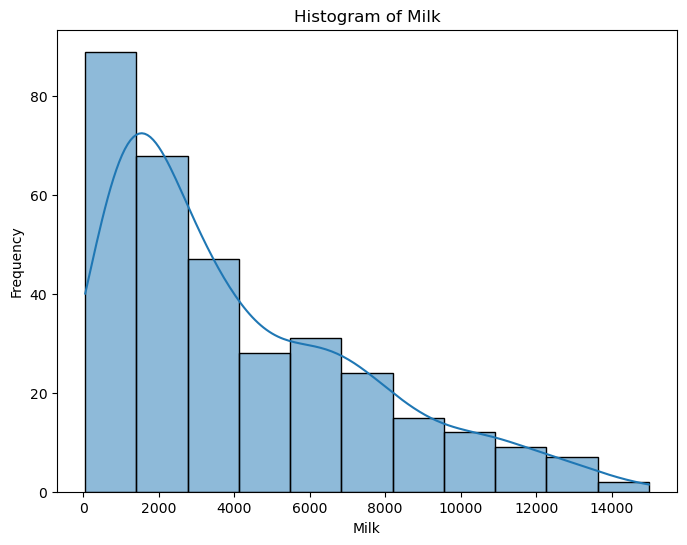

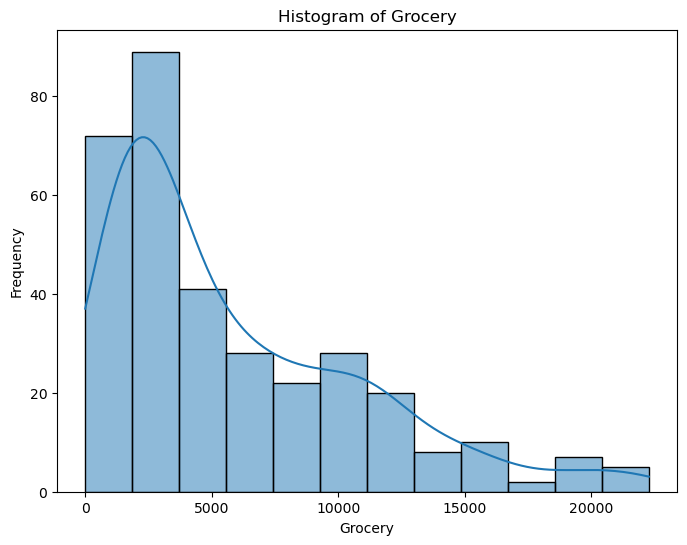

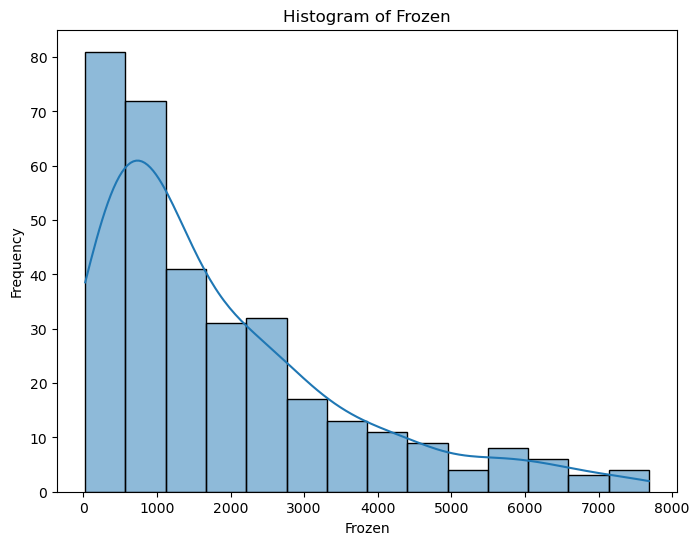

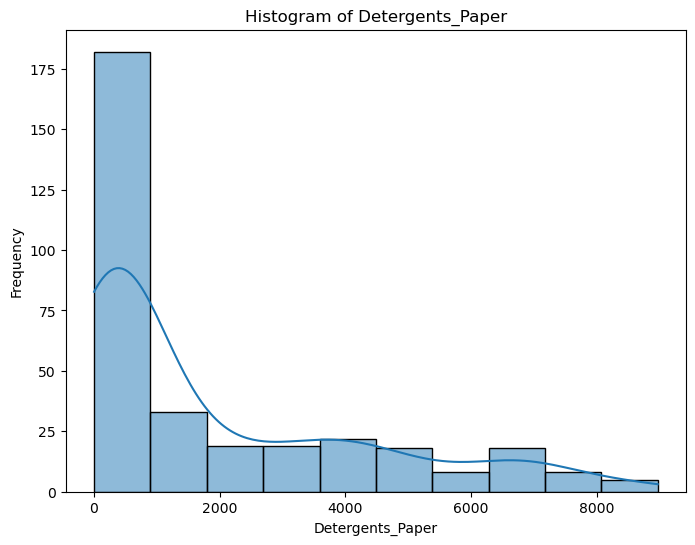

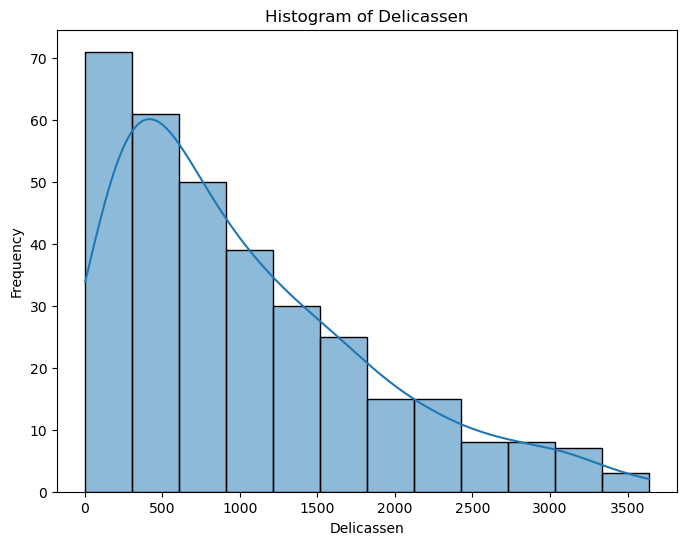

In [707]:
for column in cleaned_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(cleaned_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Hierarchical Clustering For A Subset Of The Dataset 

In [708]:
samples=cleaned_df.loc[:100,:]
samples

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
96,2,3,23,2616,8118,145,3874,217
97,1,3,403,254,610,774,54,63
98,1,3,503,112,778,895,56,132
99,1,3,9658,2182,1909,5639,215,323


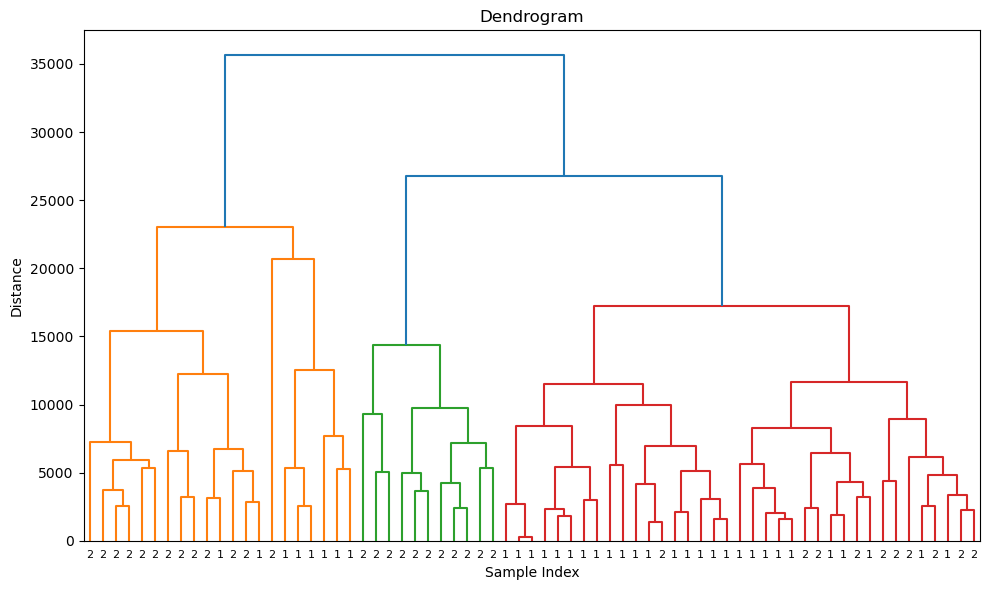

In [709]:
mergings = linkage(samples, method='complete')
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
dendrogram(mergings, labels=samples['Channel'].tolist(), leaf_rotation=0, leaf_font_size=8)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.tight_layout()
plt.show()

In [710]:
# Extract the Labels
labels=fcluster(mergings,15,criterion='distance')
print(labels)

[62 27 55 63 56 66 48 22 31 60 21  7  9 61 28 10 64 12 36 14 53 58 11 46
 15 20 35 32  6 13  4  1 24  2 37 50 29 18 49 25 59 68 65 69 23 38 43  8
 41 39 67 17 42 51 47 40 30  3 16 57 19 52 26 45 44 33 34 54  5]


# T_SNE for 2 Dimensional Map For A Subset Of The Dataset 

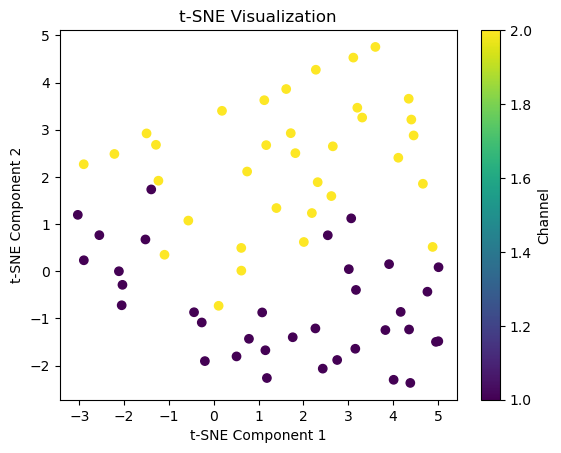

In [711]:
model=TSNE(learning_rate=100)
transformed=model.fit_transform(samples)
xs=transformed[:,0]
ys=transformed[:,1]
colors = samples['Channel']
plt.scatter(xs,ys,c=colors)
plt.colorbar(label='Channel')  
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

## PCA Transformation 

In [712]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(cleaned_df)

In [713]:
pca=PCA()
pca.fit(features_scaled)


PCA()

In [714]:
features=range(pca.n_components_)
features

range(0, 8)

##### Compare the variance To Extract the Highest Ones 

###### The Informative is  0 , 1 ,2 , Maybe 3 

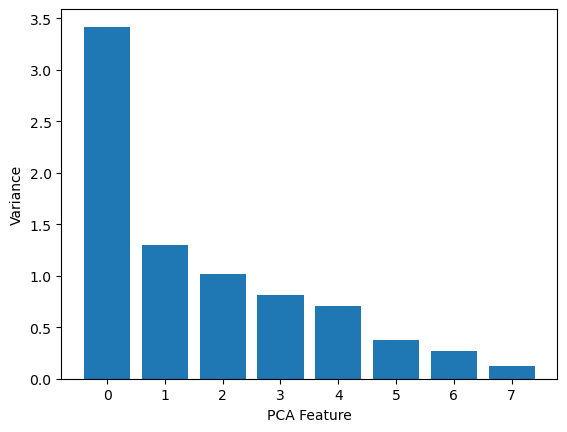

In [715]:
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.ylabel('Variance')
plt.xlabel('PCA Feature')
plt.show()

##### We Spacify How many Component we want  
#### n_components=5

In [716]:
pca_2=PCA(n_components=5)
pca_2.fit(features_scaled)


PCA(n_components=5)

In [717]:
transformed=pca_2.transform(features_scaled)
transformed.shape

(332, 5)

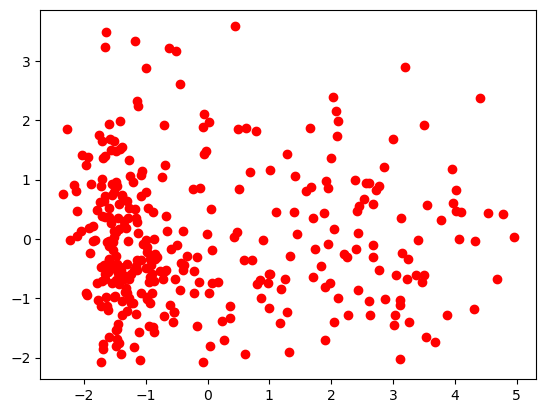

In [718]:
xs = transformed[:, 0]  
ys = transformed[:, 1]  
plt.scatter(xs, ys, c='red')
plt.show()

# Preprocessing and Modeling  the Data

In [719]:
x=cleaned_df.iloc[:,2:]

In [720]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cleaned_df)
    wcss.append(kmeans.inertia_)

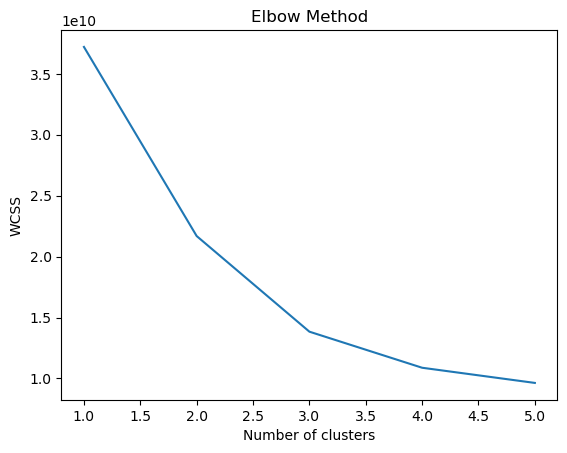

In [721]:
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [722]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)



In [723]:
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(scaled_data)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [724]:
cluster_labels =pipeline.predict(x)
print(f'Cluster: {cluster_labels}')

Cluster: [1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 1 1 2 2 1
 1 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2
 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1
 1 1 2 1 1 2 1 1 2 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 2 1 2 1 2 2 2 2 2 1 1
 1 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 1 2 1 2 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 2 1 2 2 1 2 2 2 1 2 1 1 1 2 1
 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 2 2 2 1 1 2 1 1 1 2 2 1 2 1 2 2 2 2 1
 1 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1]


#### New Data 

In [725]:
data = {
    'Fresh': [234, 435, 456, 789, 7789],
    'Milk': [966, 980, 808, 196, 510],
    'Grocery': [7561, 858, 436, 213, 123],
    'Frozen': [761, 162, 2405, 644, 395],
    'Detergents_Paper': [21, 393, 316, 57, 177],
    'Delicassen': [138, 176, 844, 788, 515]
}

df = pd.DataFrame(data)
print(df)

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    234   966     7561     761                21         138
1    435   980      858     162               393         176
2    456   808      436    2405               316         844
3    789   196      213     644                57         788
4   7789   510      123     395               177         515


In [726]:
labels=pipeline.predict(df)
labels

array([1, 1, 2, 2, 2])

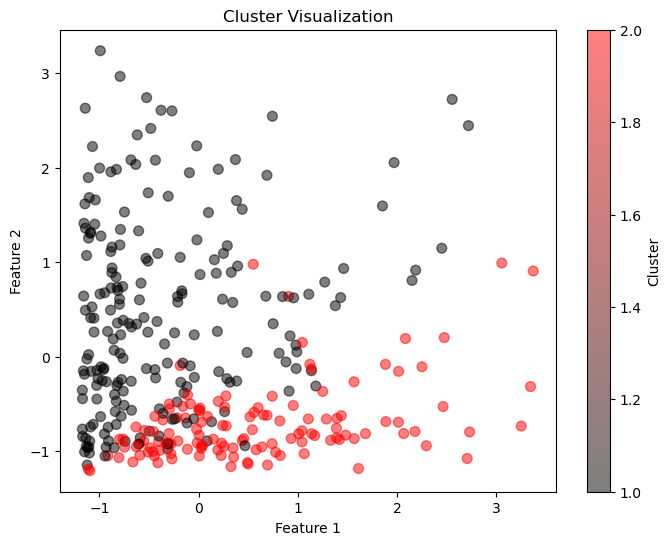

In [733]:
colors = [(0, 0, 0), (1, 0, 0)] 
custom_cmap = LinearSegmentedColormap.from_list("custom_red_black", colors)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap=custom_cmap, s=50, alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()